**Metody eksploracji danych - projekt**

Jakub Mańko, Milad Al Masri

**Analiza eksploracyjna zbioru danych**

In [134]:
#Import bibliotek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
#Wczytanie zbioru
df = pd.read_csv("dataset.csv", index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Opisy poszczególnych kolumn w zbiorze**

*   **track_id** - id utworu na Spotify.
*   **artists** - imiona artystów, którzy wykonali utwór.
*   **album_name** - nazwa albumu, w którym znajduje się utwór.
*   **track_name** - nazwa utworu.
*   **popularity** - miara popularności utworu od 0 do 100. Im wyższa wartość, tym bardziej dany utwór jest teraz na czasie.
*   **duration_ms** - długość utworu w milisekundach.
*   **explicit** - czy utwór posiada wulgaryzmy? True - tak, False - nie.
*   **danceability** - miara od 0 do 1 określająca, jak bardzo utwór nadaje się do tańca. Im wyższa wartość, tym lepszy jest to utwór do tańczenia.
*   **energy** - cecha liczbowa z zakresem od 0 do 1 reprezentująca percepcyjną miarę intensywności utworu. Im wyższa wartość, tym bardziej jest dany utwór energiczny.
*   **key** - cecha oznaczająca tonację, w której dany utwór został zapisany. Jest reprezentowana jako liczba całkowita od 0 do 11. Jeśli tonacja jest nieokreślona, cecha przyjmuje wartość -1.
*   **loudness** - ogólna głośność utworu wyrażona w decybelach.
*   **mode** - cecha wskazująca modalność (dur lub moll) utworu, rodzaj skali, z której pochodzi jego treść melodyczna. Liczba 1 oznacza skalę durową, a 0 oznacza skalę molową.
*   **speechiness** - cecha liczbowa z zakresem od 0 do 1 określająca obecność wypowiadanych słów w utworze. Im bardziej nagranie przypomina mowę (np. audiobook), tym wartość cechy jest bliższa 1. Wartości powyżej 0,66 opisują utwory, które prawdopodobnie składają się w całości z wypowiadanych słów.
*   **acousticness** - miara od 0 do 1 określająca prawdopodobieństwo, że utwór jest akustyczny.
*   **instrumentalness** - miara od 0 do 1 przewidująca, czy utwór nie zawiera wokalu. Utwory rapowe będą wyraźnie "wokalne". Im wartość jest bliższa 1, tym większe prawdopodobieństwo, że utwór nie zawiera treści wokalnych.
*   **liveness** - miara od 0 do 1 określająca, czy utwór został wykonany na żywo w obecności publiczności. Im wartość bliższa 1, tym większe prawdopodobieństwo, że utwór został nagrany na żywo z publicznością.
*   **valence** - miara od 0 do 1 opisująca pozytywność przekazywaną przez utwór. Wartości bliższe 1 wskazują, że utwór jest bardziej pozytywny (radosny). Wartości bliższe 0 wskazują, że utwór jest bardziej negatywny (smutny, przygnębiający).
*   **tempo** - ogólne tempo utworu wyrażone w jednostkach metrycznych na minutę (BPM). Im wyższa wartość, tym szybszy jest utwór.
*   **time_signature** - metrum utworu. Przyjmuje wartość od 3 do 7. 3 oznacza 3/4, 4 oznacza 4/4, 5 oznacza 5/4 itd.
*   **track_genre** - gatunek utworu

**Przygotowanie zbioru danych do analizy**

Usunięcie kolumny track_id

In [136]:
#Usunięcie kolumny track_id
df = df.drop(df.columns[0], axis=1)

Sprawdzenie, czy są rekordy z brakującymi danymi

In [137]:
#Liczba rekordów z brakującymi danymi
df.isnull().any(axis=1).sum()

1

Wyświetlenie rekordu z brakującymi danymi

In [138]:
#Wyświetlenie rekordu z brakującymi danymi
df[df.isnull().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Usunięcie rekordu

In [139]:
#Usunięcie rekordu z brakującymi danymi
df = df.drop(65900)

Sprawdzenie, czy rekordy mają spójne wartości we wszystkich kolumnach:

In [140]:
#Liczba rekordów, które nie mają popularity w przedziale od 0 do 100
df[~df['popularity'].between(0, 100)].sum(axis=1)

,0


In [141]:
#Sprawdzenie, czy są rekordy, które mają czas trwania utworu mniejszy lub równy zero
(df['duration_ms'] <= 0).sum()

0

In [142]:
#Liczba rekordów, które nie mają explicit typu boolean
mask = ~df['explicit'].isin([True, False])
mask.sum()

0

In [143]:
#Liczba rekordów, które nie mają danceability, energy, speechiness, acousticness, instrumentalness, liveness i valence w przedziale od 0 do 1
columns_to_check = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
mask_out_of_range = (df[columns_to_check] < 0) | (df[columns_to_check] > 1)
mask_out_of_range.any(axis=1).sum()

0

In [144]:
#Liczba rekordów, które mają tempo równe lub mniejsze od 0
(df['tempo'] <= 0).sum()

157

In [145]:
#Usunięcie rekordów z tempem równym lub mniejszym od 0
df = df[df['tempo'] > 0]

In [146]:
#Liczba rekordów, które nie mają time_signature w przedziale od 3 do 7
mask = ~df['time_signature'].isin([3,4,5,6,7])
mask.sum()

979

In [147]:
#Usunięcie rekordów, które nie mają time_signature w przedziale od 3 do 7
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]

In [148]:
#Liczba rekordów, które nie mają dozwolonych wartości w kolumnie key
mask = ~df['key'].isin([-1,0,1,2,3,4,5,6,7,8,9,10,11])
mask.sum()

0

In [149]:
#Liczba rekordów, które nie mają dozwolonych wartości w kolumnie mode
mask = ~df['mode'].isin([0,1])
mask.sum()

0

**Analiza zbioru**

Korelacje między cechami liczbowymi:

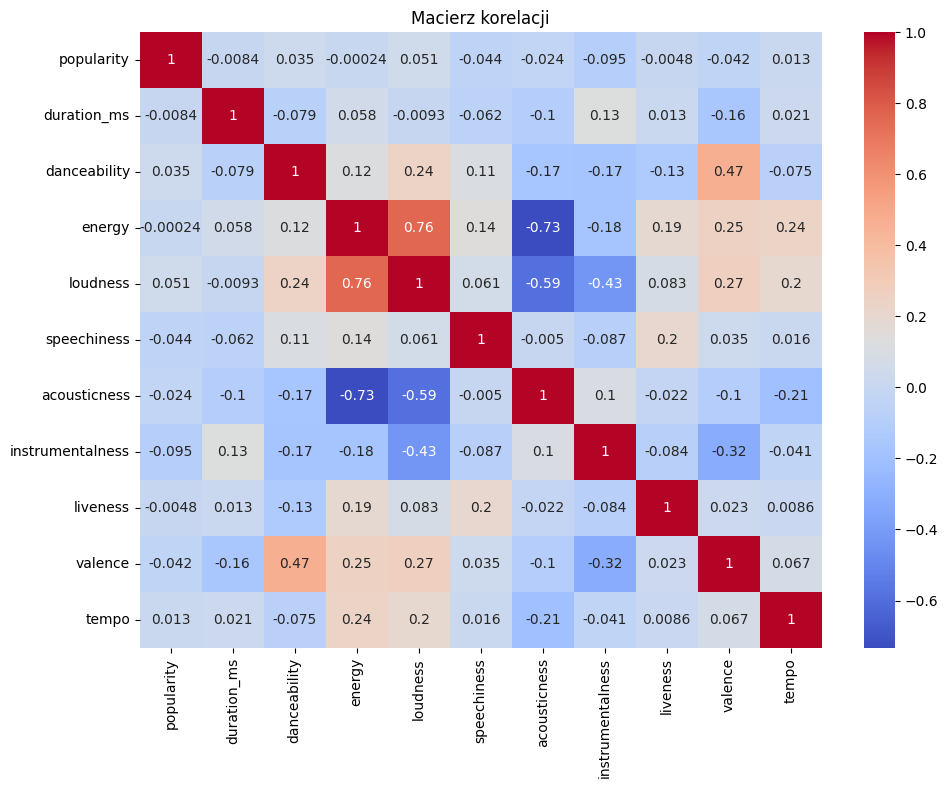

In [150]:
#Macierz korelacji
df_corr = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

plt.figure(figsize=(11, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

Analiza macierzy korelacji:

Silną korelację ujemną (-0.73) mają zmienne energy i acousticness. Korelacja ta oznacza, że:
*   bardziej energiczne utwory mają zazwyczaj mniejsze prawdopodobieństwo bycia utworami akustycznymi
*   utwory mające większe prawdopodobieństwo bycia utworami akustycznymi są zazwyczaj mniej energiczne

Wyraźną korelację ujemną (-0.59) mają zmienne acousticness i loudness. Korelacja ta oznacza, że:
*   utwory głośniejsze mają z reguły mniejsze prawdopodobieństwo bycia utworami akustycznymi
*   utwory mające większe prawdopodobieństwo bycia utworami akustycznymi są z reguły cichsze

Silną korelację dodatnią (0.76) mają zmienne energy i loudness. Korelacja ta oznacza, że:
*   utwory głośniejsze są zazwyczaj bardziej energiczne
*   utwory cichsze są zazwyczaj mniej energiczne

Umiarkowaną korelację dodatnią (0.47) mają zmienne danceability i valence. Korelacja ta oznacza, że:
*   utwory bardziej pozytywne są zwykle lepsze do tańczenia
*   utwory bardziej negatywne są zwykle gorsze do tańczenia

Procent utworów z wulgaryzmami w każdym gatunku

In [151]:
# Grupowanie według gatunków i obliczanie procentu piosenek z wulgaryzmami
explicit_percent = (
    df.groupby('track_genre')['explicit']
    .mean() # Średnia da nam część piosenek, które mają wulgaryzmy
    .mul(100) # Przeliczenie na procenty
    .reset_index()
    .rename(columns={'explicit': 'explicit_percentage'})
)

explicit_percent_sorted = explicit_percent.sort_values(by='explicit_percentage', ascending=False)

for index, row in explicit_percent_sorted.iterrows():
    print(f"{row['track_genre']}: {row['explicit_percentage']:.2f}%")

comedy: 65.57%
emo: 46.59%
sad: 45.13%
j-dance: 39.07%
hardcore: 32.56%
hip-hop: 31.55%
funk: 30.32%
dancehall: 30.23%
metalcore: 29.31%
death-metal: 25.13%
latino: 24.97%
industrial: 23.49%
french: 22.01%
turkish: 21.89%
reggaeton: 21.24%
dance: 17.40%
chill: 17.20%
reggae: 16.75%
alternative: 16.43%
grindcore: 15.35%
electro: 15.25%
metal: 14.24%
latin: 13.33%
black-metal: 13.27%
german: 12.82%
happy: 12.55%
electronic: 12.05%
house: 10.70%
punk: 10.62%
edm: 10.61%
indie-pop: 10.58%
soul: 10.42%
groove: 9.73%
hardstyle: 9.63%
swedish: 9.56%
garage: 9.54%
dubstep: 9.54%
r-n-b: 8.69%
club: 8.57%
brazil: 8.44%
heavy-metal: 8.32%
indie: 8.29%
iranian: 8.27%
punk-rock: 8.02%
pop: 7.49%
dub: 7.41%
grunge: 7.24%
goth: 6.62%
alt-rock: 5.61%
anime: 5.44%
acoustic: 5.25%
progressive-house: 5.21%
k-pop: 4.93%
hard-rock: 4.91%
breakbeat: 4.80%
songwriter: 4.61%
singer-songwriter: 4.61%
trip-hop: 4.53%
party: 4.52%
synth-pop: 4.41%
rock: 4.30%
british: 3.94%
spanish: 3.81%
malay: 3.70%
power-pop:

Największy procent piosenek (65,57 %) z wulgaryzmami ma gatunek comedy. Na drugim miejscu jest gatunek emo (46,59 %), a na trzecim gatunek sad (45,13 %).

Spory procent piosenek z wulgaryzmami mają też takie gatunki, jak hip-hop, hardcore (gatunek wyrażający intensywne emocje w brzmieniu i tekstach) , czy j-dance (gatunek związany z japońską muzyką).

Można też zauważyć, że w zbiorze tym jest kilka piosenek z Disneya, które zawierają wulgaryzmy.

Statystyki dla cech numerycznych

In [152]:
df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,112863.000000,1.128630e+05,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000,112863.000000
mean,33.269335,2.282811e+05,0.568837,0.643684,-8.199521,0.084413,0.312265,0.154050,0.212945,0.475943,122.437781
std,22.333646,1.059998e+05,0.171772,0.249659,4.945812,0.104344,0.330916,0.307632,0.189572,0.258595,29.633223
min,0.000000,1.580000e+04,0.051300,0.000020,-46.591000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000
25%,17.000000,1.745450e+05,0.458000,0.475000,-9.955000,0.035900,0.016700,0.000000,0.097900,0.262000,99.747500
50%,35.000000,2.131200e+05,0.582000,0.686000,-6.975000,0.049000,0.166000,0.000040,0.132000,0.466000,122.057000
75%,50.000000,2.616375e+05,0.695000,0.854000,-4.991000,0.084600,0.591000,0.045750,0.273000,0.684000,140.105000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


**Przygotowanie zbioru przed opracowaniem modelu**

Usuwanie punktów odstających dla każdej cechy numerycznej w każdym gatunku

In [153]:
# Funkcja do usuwania punktów odstających dla każdego gatunku
def remove_outliers(group, feature):
    Q1 = group[feature].quantile(0.25)  # 25 percentyl
    Q3 = group[feature].quantile(0.75)  # 75 percentyl
    IQR = Q3 - Q1                       # Przedział międzykwartylowy (IQR)
    lower_bound = Q1 - 1.5 * IQR        # Dolna granica
    upper_bound = Q3 + 1.5 * IQR        # Górna granica

    return group[(group[feature] >= lower_bound) & (group[feature] <= upper_bound)]

features_to_check = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for feature in features_to_check:
    df = df.groupby('track_genre', group_keys=False).apply(lambda g: remove_outliers(g, feature))

<ipython-input-153-bc7827b8f368>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre', group_keys=False).apply(lambda g: remove_outliers(g, feature))
<ipython-input-153-bc7827b8f368>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('track_genre', group_keys=False).apply(lambda g: remove_outliers(g, feature))
<ipython-input-153-bc7827b8f368>:14: DeprecationWarning:

Funkcja oblicza percentyle:
*   Q1 - pierwszy kwartyl (25. percentyl) — wartość, poniżej której znajduje się 25% danych.
*   Q3 - trzeci kwartyl (75. percentyl) — wartość, poniżej której znajduje się 75% danych.

Potem oblicza IQR - zakres między kwartylami obejmujący centralne 50% danych. Wyznacza dolną i górną granicę:
*   Dolna granica: Q1 - 1,5 ⋅ IQR
*   Element listy: Q3 + 1,5 ⋅ IQR

Wartości poza tymi granicami są uznawane za odstające.




Dodanie kolumny klasyfikującej długość utworu w zależności długości trwania i gatunku

In [155]:
stats = df.groupby('track_genre')['duration_ms'].agg(['median'])
stats['Q1'] = df.groupby('track_genre')['duration_ms'].quantile(0.25)
stats['Q3'] = df.groupby('track_genre')['duration_ms'].quantile(0.75)

def categorize_duration_by_genre(row, stats):
    genre = row['track_genre']
    duration = row['duration_ms']

    Q1 = stats.loc[genre, 'Q1']
    Q3 = stats.loc[genre, 'Q3']

    #0 - krótki utwór, 1 - średni utwór, 2 - długi utwór
    if duration < Q1:
        return 0
    elif Q1 <= duration <= Q3:
        return 1
    else:
        return 2

df['duration_category'] = df.apply(categorize_duration_by_genre, axis=1, args=(stats,))

In [156]:
stats

,median,Q1,Q3
track_genre,,,
acoustic,216820.5,183187.75,244800.00
afrobeat,227826.0,194403.00,263320.00
alt-rock,224213.0,195493.00,250786.00
alternative,213946.0,182903.00,243244.50
ambient,208621.0,158132.50,270882.50
...,...,...,...
techno,369303.0,251517.00,432789.00
trance,239984.0,191995.50,384720.00
trip-hop,256232.5,218556.00,305716.25


Dodawana jest nowa kolumna duration_category, która przypisuje utworom jedną z trzech kategorii długości (krótki, średni, długi) w zależności od długości utworu (duration_ms) i gatunku (track_genre).

Obiekt stats przechowuje podstawowe statystyki dla zmiennej duration_ms dla każdego gatunku. Median to mediana długości utworu dla danego gatunku, Q1 to pierwszy kwartyl (25. percentyl) dla danego gatunku, a Q3 to trzeci kwartyl (75. percentyl) dla danego gatunku.

Jeśli czas trwania jest krótszy niż pierwszy kwartyl (Q1), utwór otrzymuje kategorię 0 (krótki). Jeśli czas trwania mieści się między Q1 a Q3, utwór otrzymuje kategorię 1 (średni). Jeśli czas trwania przekracza trzeci kwartyl (Q3), utwór otrzymuje kategorię 2 (długi).

Standaryzacja

Kolumny takie jak duration_ms, loudness, tempo mogą mieć różne skale, co może wpłynąć później na działanie modelu. Wartości tych cech zostaną ustandaryzowane (skalowanie tak, by średnia wynosiła 0, a odchylenie standardowe 1).

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['duration_ms', 'loudness', 'tempo']] = scaler.fit_transform(df[['duration_ms', 'loudness', 'tempo']])

Dodanie cech interakcji

Zostaną dodane cechy interakcji, aby uchwycić współdziałanie między niektórymi cechami.

In [158]:
df['danceability_energy'] = df['danceability'] * df['energy']
df['danceability_valence'] = df['danceability'] * df['valence']
df['tempo_energy'] = df['tempo'] * df['energy']

Zmiana typu kolumny explicit z boolean na int

In [159]:
df['explicit'] = df['explicit'].astype(int)